# Computational time figure

This notebook has the code to create a line graph of simulation time.

The simulation times are saved in a csv file that is generated by using `time-num-causal.ipynb` and `time-num-individual.ipynb`.

The simulation time of `tstrait` is compared with the simulation framework described in Martin et al. (2017) (https://www.sciencedirect.com/science/article/pii/S0002929717301076)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Create a dataframe with mean values of tstrait's simulation time
df1 = pd.read_csv("output/tstrait_time.csv")
df2 = pd.read_csv("output/tstrait_time_2.csv")
df3 = pd.read_csv("output/tstrait_time_3.csv")
mean_df = pd.concat([df1, df2, df3]).mean()

In [3]:
num_ind = [1000, 5000, 10_000, 25_000, 50_000, 100_000, 250_000, 500_000]
time_result = {
    "fifty": [], "hundred": [], "two_hundred": []
}

for i in num_ind:
    time_result["fifty"].append(mean_df["{}_50Mb".format(i)])
    time_result["hundred"].append(mean_df["{}_100Mb".format(i)])
    time_result["two_hundred"].append(mean_df["{}_200Mb".format(i)])
    
for i in range(1,6):
    time_result["fifty"].append(mean_df["{}e6_50Mb".format(i)])
    time_result["hundred"].append(mean_df["{}e6_100Mb".format(i)])
    time_result["two_hundred"].append(mean_df["{}e6_200Mb".format(i)])

In [4]:
# Create a list of the simulation time by Martin et al. (2017)'s simulation algorithm
num_ind = [1000, 5000, 10_000, 25_000, 50_000, 100_000, 250_000]
mean_df = pd.read_csv("output/previous_time.csv").mean()
previous_time = []

for i in num_ind:
    previous_time.append(mean_df["Martin_{}_100Mb".format(i)])

In [5]:
# Create a dataframe with mean values of tstrait's simulation time from the French Canadian dataset and the 1000 Genomes Project
num_causal_result = {
    "french": [], "thousand": []
}

mean_df = pd.read_csv("output/tstrait_num_causal.csv").mean()

num_causal = [50, 100, 500, 1000, 2500, 5000, 7500, 10000]

for i in num_causal:
    num_causal_result["french"].append(mean_df["French_Canadian_{}".format(i)])
    num_causal_result["thousand"].append(mean_df["1000_Genomes_{}".format(i)])

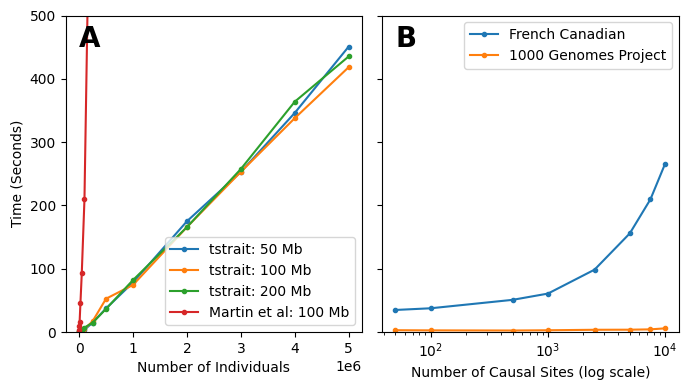

In [18]:
fig, axs = plt.subplots(1,2,figsize=(7,4), sharey=True)

num_ind = [1000, 5000, 10_000, 25_000, 50_000, 100_000, 250_000, 500_000,
          1_000_000, 2_000_000, 3_000_000, 4_000_000, 5_000_000]

previous_num_ind = [1000, 5000, 10_000, 25_000, 50_000, 100_000, 250_000]

axs[0].plot(num_ind, time_result["fifty"], label="tstrait: 50 Mb", marker=".")
axs[0].plot(num_ind, time_result["hundred"], label="tstrait: 100 Mb", marker=".")
axs[0].plot(num_ind, time_result["two_hundred"], label="tstrait: 200 Mb", marker=".")
axs[0].plot(previous_num_ind, previous_time, label="Martin et al: 100 Mb", marker=".")
axs[0].set_xlabel('Number of Individuals')
axs[0].set_ylabel('Time (Seconds)')
axs[0].text(100, 450, "A", weight="bold", size=20)
axs[0].set_ylim((0,500))
axs[0].legend(loc="lower right")

num_causal = [50, 100, 500, 1000, 2500, 5000, 7500, 10000]
axs[1].semilogx(num_causal, num_causal_result["french"], label="French Canadian", marker=".")
axs[1].semilogx(num_causal, num_causal_result["thousand"], label="1000 Genomes Project", marker=".")
axs[1].set_xlabel('Number of Causal Sites (log scale)')
#axs[1].set_ylabel('Time (Seconds, log scale)')
axs[1].legend(loc="upper right")
plt.text(50, 450, "B", weight="bold", size=20)

plt.tight_layout()
plt.savefig("../figures/time-scaling.pdf")
plt.show()